In [1]:
## imported needed 
import numpy

import tensorflow as tf
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os
from IPython.display import clear_output

In [3]:
## just shows if GPU acceleration is avaialble... need CUDA compatible GPU. check tf website for compatibility
## for tensorflow 2.0 just pip install tensorflow... otherwise use tensorflow-gpu

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  0


In [4]:
## load images that will be used for training and testing
imgDirec = 'train_data/train_homography.npy'

# load the data into a numpy array
X_data = np.load(imgDirec)

print('Number of images: ' + str(len(X_data)))
X_data.shape

Number of images: 20399


(20399, 72, 96)

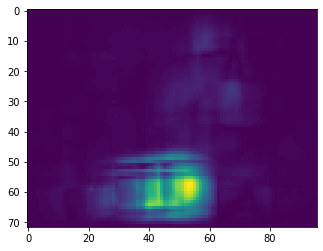

In [5]:
X_data = X_data / 255
img = plt.imshow(X_data[0])


In [7]:
## load output (speed data) that will be used for trianing and testing
spdDirec = 'train_data/train.txt'
file = open(spdDirec, 'r')
y_data = []
count = 0
for line in file:
    if count == len(X_data):
        break
    y_data.append(float(line))
    count += 1
    
print('Number of speeds imported: ' + str(len(y_data)))
y_data = np.array(y_data)

Number of speeds imported: 20399


Speed: 22.964618


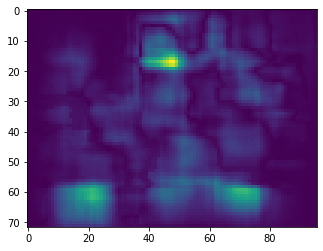

In [8]:
## get train and test data
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.20)
print("Speed: " + str(y_train[0]))
img = plt.imshow(X_train[0])

In [20]:
## create a sequential model using keras
# layers for the model
s = np.array(X_train.shape)
finalSize = int(max(y_data)) + 1
input_shape = (s[1], s[2], 1)

layers = [
            Conv2D(32, activation="relu",  input_shape=input_shape, kernel_size=3),
            Conv2D(64, activation="relu",  padding ='same', kernel_size=3),
            MaxPool2D((2,2)),
            Conv2D(128, activation="relu",  padding ='same', kernel_size=3),
            Conv2D(128, activation="relu",  padding ='same', kernel_size=3),
            MaxPool2D((2,2)),
            Conv2D(256, activation="relu",  padding ='same', kernel_size=3),
            Conv2D(256, activation="relu",  padding ='same', kernel_size=3),
            MaxPool2D((2,2)),
            Flatten(),
            Dropout(0.2),
            Dense(128, activation='relu'),
            Dropout(0.2),
            Dense(128, activation='relu'),
            Dropout(0.2),
            Dense(1)
         ]

# construct the model
model = Sequential(layers)

# train the model and show summary
model.compile(optimizer="adam", loss='mean_squared_error', metrics=['mean_squared_error'])
model.fit(X_train.reshape(-1, s[1], s[2] ,1), y_train, epochs=25, batch_size=10)
model.summary()

Epoch 1/25
1632/1632 [==============================] - 532s 326ms/step - loss: 57.3871 - mean_squared_error: 57.3871
Epoch 2/25
1632/1632 [==============================] - 535s 328ms/step - loss: 34.7148 - mean_squared_error: 34.7148
Epoch 3/25
1632/1632 [==============================] - 512s 314ms/step - loss: 27.8222 - mean_squared_error: 27.8222
Epoch 4/25
1632/1632 [==============================] - 512s 314ms/step - loss: 25.1819 - mean_squared_error: 25.1819
Epoch 5/25
1632/1632 [==============================] - 529s 324ms/step - loss: 22.4721 - mean_squared_error: 22.4721
Epoch 6/25
1632/1632 [==============================] - 499s 306ms/step - loss: 20.1590 - mean_squared_error: 20.1590
Epoch 7/25
1632/1632 [==============================] - 497s 305ms/step - loss: 17.9909 - mean_squared_error: 17.9909
Epoch 8/25
1632/1632 [==============================] - 497s 305ms/step - loss: 16.1277 - mean_squared_error: 16.1277
Epoch 9/25
1632/1632 [==============================] - 

In [50]:
## evaluate the model
scores = model.evaluate(X_test.reshape(-1, s[1], s[2] ,1), y_test)

128/128 [==============================] - 32s 252ms/step - loss: 1.7767 - mean_squared_error: 1.7767


In [51]:
model.save('cnn_20epoch')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model_2\assets


In [52]:
from keras.models import load_model
importedModel = load_model('model_2')
importedModel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 70, 94, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 70, 94, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 35, 47, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 35, 47, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 35, 47, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 17, 23, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 17, 23, 256)       2

In [58]:
## import unknown test data provided by comma.ai
direc = 'test_data/test_images.npy'
# load the data into a numpy array
t_data = np.load(direc)
print(importedModel.predict(X_data[962].reshape(-1, 72, 96 ,1)))


[[19.017567]]
